In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***Read in excel file***

In [91]:
df = pd.ExcelFile(r'../Data/raw_data/41467_2019_13483_MOESM4_ESM.xlsx')

***Read in sheets from excel file***

In [92]:
exp_data = df.parse('Expression Data', index_col='log-TPM')
metadata = df.parse('Metadata')

In [93]:
exp_data.head()

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,efeU__menFentC_ale29__1,efeU__menFentC_ale29__2,efeU__menFentC_ale30__1,efeU__menFentC_ale30__2,efeU__menFentCubiC_ale36__1,efeU__menFentCubiC_ale36__2,efeU__menFentCubiC_ale37__1,efeU__menFentCubiC_ale37__2,efeU__menFentCubiC_ale38__1,efeU__menFentCubiC_ale38__2
log-TPM,,,,,,,,,,,,,,,,,,,,,
b0002,11.006653,11.130196,11.704951,11.888217,11.064810,10.779071,9.976401,10.291135,11.229767,11.214065,...,10.271327,10.276565,11.148538,11.170578,11.676604,11.726097,11.881529,11.923237,11.496410,11.552762
b0003,10.415654,10.523138,11.423835,11.803781,10.776984,10.597810,9.596833,10.191503,10.897938,10.861157,...,10.160291,10.116861,10.314322,10.392251,10.916426,10.909277,11.023924,11.038426,10.624301,10.764195
b0004,10.594871,10.725062,10.457270,10.779162,10.394971,10.113950,8.741617,9.082231,10.185151,10.164655,...,10.475069,10.434352,10.679541,10.723953,11.143310,11.112721,11.184795,11.241845,10.953206,11.001006
b0005,6.316102,6.258499,5.422129,5.336121,6.716069,6.410864,4.626949,4.756153,6.527653,6.136168,...,5.979079,5.705586,6.306120,6.291340,5.058537,4.835550,5.448097,5.757951,5.873964,5.808618
b0006,6.915771,6.897597,6.775645,6.782605,6.761813,6.816532,6.686767,6.860036,6.862147,6.817480,...,8.371287,8.322390,8.137515,8.071837,7.354131,7.365536,7.328101,7.314761,8.057750,8.105213


In [94]:
metadata.head()

,Sample ID,Study,Project ID,Condition ID,Replicate #,Strain Description,Strain,Base Media,Carbon Source (g/L),Nitrogen Source (g/L),...,Culture Type,Growth Rate (1/hr),Evolved Sample,Isolate Type,Sequencing Machine,Additional Details,Biological Replicates,Alignment,DOI,GEO
0,control__wt_glc__1,Control,control,wt_glc,1,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),...,Batch,NaN,No,NaN,MiSeq,NaN,2,94.33,doi.org/10.1101/080929,GSE65643
1,control__wt_glc__2,Control,control,wt_glc,2,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),...,Batch,NaN,No,NaN,MiSeq,NaN,2,94.24,doi.org/10.1101/080929,GSE65643
2,fur__wt_dpd__1,Fur,fur,wt_dpd,1,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),...,Batch,0.000000,No,NaN,MiSeq,NaN,2,98.04,doi.org/10.1038/ncomms5910,GSE54900
3,fur__wt_dpd__2,Fur,fur,wt_dpd,2,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),...,Batch,0.000000,No,NaN,MiSeq,NaN,2,98.30,doi.org/10.1038/ncomms5910,GSE54900
4,fur__wt_fe__1,Fur,fur,wt_fe,1,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),...,Batch,1.060606,No,NaN,MiSeq,NaN,2,93.35,doi.org/10.1038/ncomms5910,GSE54900


***Remove all Sample IDs that contain no growth rate information***

In [95]:
metadata_clean = metadata.dropna(subset=['Growth Rate (1/hr)'])
metadata_clean = metadata_clean[metadata_clean['Growth Rate (1/hr)'] != 0]

In [5]:
#metadata_clean = metadata_clean[['Sample ID', 'Growth Rate (1/hr)']]

In [96]:
metadata_clean

,Sample ID,Study,Project ID,Condition ID,Replicate #,Strain Description,Strain,Base Media,Carbon Source (g/L),Nitrogen Source (g/L),...,Culture Type,Growth Rate (1/hr),Evolved Sample,Isolate Type,Sequencing Machine,Additional Details,Biological Replicates,Alignment,DOI,GEO
4,fur__wt_fe__1,Fur,fur,wt_fe,1,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),...,Batch,1.060606,No,NaN,MiSeq,NaN,2,93.35,doi.org/10.1038/ncomms5910,GSE54900
5,fur__wt_fe__2,Fur,fur,wt_fe,2,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),...,Batch,1.060606,No,NaN,MiSeq,NaN,2,92.38,doi.org/10.1038/ncomms5910,GSE54900
8,fur__delfur_fe2__1,Fur,fur,delfur_fe2,1,Escherichia coli K-12 MG1655 del_fur,MG1655,M9,glucose(2),NH4Cl(1),...,Batch,0.619469,No,NaN,MiSeq,NaN,2,92.80,doi.org/10.1038/ncomms5910,GSE54900
9,fur__delfur_fe2__2,Fur,fur,delfur_fe2,2,Escherichia coli K-12 MG1655 del_fur,MG1655,M9,glucose(2),NH4Cl(1),...,Batch,0.619469,No,NaN,MiSeq,NaN,2,93.24,doi.org/10.1038/ncomms5910,GSE54900
55,omics__bw_ac__1,Omics,omics,bw_ac,1,Escherichia coli BW25113,BW25113,M9,acetate(3.5),NH4Cl(1),...,Batch,0.203000,No,NaN,MiSeq,NaN,2,97.80,doi.org/10.1038/ncomms13091,GSE59759
56,omics__bw_ac__2,Omics,omics,bw_ac,2,Escherichia coli BW25113,BW25113,M9,acetate(3.5),NH4Cl(1),...,Batch,0.203000,No,NaN,MiSeq,NaN,2,98.04,doi.org/10.1038/ncomms13091,GSE59759
57,omics__bw_fum__1,Omics,omics,bw_fum,1,Escherichia coli BW25113,BW25113,M9,fumarate(2.8),NH4Cl(1),...,Batch,0.309000,No,NaN,MiSeq,NaN,2,97.94,doi.org/10.1038/ncomms13091,GSE59759
58,omics__bw_fum__2,Omics,omics,bw_fum,2,Escherichia coli BW25113,BW25113,M9,fumarate(2.8),NH4Cl(1),...,Batch,0.309000,No,NaN,MiSeq,NaN,2,98.32,doi.org/10.1038/ncomms13091,GSE59759
59,omics__bw_glc__1,Omics,omics,bw_glc,1,Escherichia coli BW25113,BW25113,M9,glucose(5),NH4Cl(1),...,Batch,0.607500,No,NaN,MiSeq,NaN,2,97.62,doi.org/10.1038/ncomms13091,GSE59759
60,omics__bw_glc__2,Omics,omics,bw_glc,2,Escherichia coli BW25113,BW25113,M9,glucose(5),NH4Cl(1),...,Batch,0.607500,No,NaN,MiSeq,NaN,2,98.13,doi.org/10.1038/ncomms13091,GSE59759


***Determining distribution of different variables***

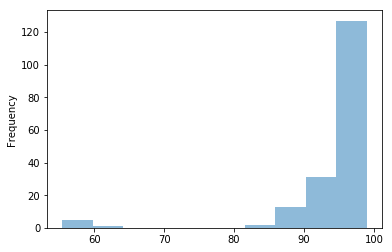

In [97]:
metadata_clean['Alignment'].plot.hist(alpha=0.5)

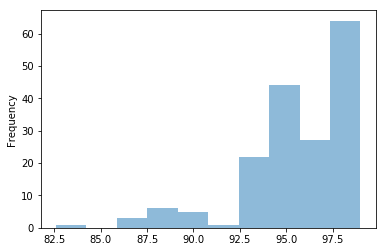

In [98]:
#Remove all Sample IDs where the alignment is less than 80%
metadata_clean = metadata_clean[metadata_clean['Alignment'] > 80]
metadata_clean['Alignment'].plot.hist(alpha=0.5)

In [99]:
metadata_clean

,Sample ID,Study,Project ID,Condition ID,Replicate #,Strain Description,Strain,Base Media,Carbon Source (g/L),Nitrogen Source (g/L),...,Culture Type,Growth Rate (1/hr),Evolved Sample,Isolate Type,Sequencing Machine,Additional Details,Biological Replicates,Alignment,DOI,GEO
4,fur__wt_fe__1,Fur,fur,wt_fe,1,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),...,Batch,1.060606,No,NaN,MiSeq,NaN,2,93.35,doi.org/10.1038/ncomms5910,GSE54900
5,fur__wt_fe__2,Fur,fur,wt_fe,2,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),...,Batch,1.060606,No,NaN,MiSeq,NaN,2,92.38,doi.org/10.1038/ncomms5910,GSE54900
8,fur__delfur_fe2__1,Fur,fur,delfur_fe2,1,Escherichia coli K-12 MG1655 del_fur,MG1655,M9,glucose(2),NH4Cl(1),...,Batch,0.619469,No,NaN,MiSeq,NaN,2,92.80,doi.org/10.1038/ncomms5910,GSE54900
9,fur__delfur_fe2__2,Fur,fur,delfur_fe2,2,Escherichia coli K-12 MG1655 del_fur,MG1655,M9,glucose(2),NH4Cl(1),...,Batch,0.619469,No,NaN,MiSeq,NaN,2,93.24,doi.org/10.1038/ncomms5910,GSE54900
55,omics__bw_ac__1,Omics,omics,bw_ac,1,Escherichia coli BW25113,BW25113,M9,acetate(3.5),NH4Cl(1),...,Batch,0.203000,No,NaN,MiSeq,NaN,2,97.80,doi.org/10.1038/ncomms13091,GSE59759
56,omics__bw_ac__2,Omics,omics,bw_ac,2,Escherichia coli BW25113,BW25113,M9,acetate(3.5),NH4Cl(1),...,Batch,0.203000,No,NaN,MiSeq,NaN,2,98.04,doi.org/10.1038/ncomms13091,GSE59759
57,omics__bw_fum__1,Omics,omics,bw_fum,1,Escherichia coli BW25113,BW25113,M9,fumarate(2.8),NH4Cl(1),...,Batch,0.309000,No,NaN,MiSeq,NaN,2,97.94,doi.org/10.1038/ncomms13091,GSE59759
58,omics__bw_fum__2,Omics,omics,bw_fum,2,Escherichia coli BW25113,BW25113,M9,fumarate(2.8),NH4Cl(1),...,Batch,0.309000,No,NaN,MiSeq,NaN,2,98.32,doi.org/10.1038/ncomms13091,GSE59759
59,omics__bw_glc__1,Omics,omics,bw_glc,1,Escherichia coli BW25113,BW25113,M9,glucose(5),NH4Cl(1),...,Batch,0.607500,No,NaN,MiSeq,NaN,2,97.62,doi.org/10.1038/ncomms13091,GSE59759
60,omics__bw_glc__2,Omics,omics,bw_glc,2,Escherichia coli BW25113,BW25113,M9,glucose(5),NH4Cl(1),...,Batch,0.607500,No,NaN,MiSeq,NaN,2,98.13,doi.org/10.1038/ncomms13091,GSE59759


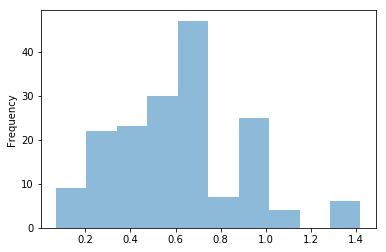

In [100]:
metadata_clean['Growth Rate (1/hr)'].plot.hist(alpha=0.5)

***Remove all columns (Sample IDs) in expression dataset if there was no growth rate information found***

In [101]:
exp_data.head()

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,efeU__menFentC_ale29__1,efeU__menFentC_ale29__2,efeU__menFentC_ale30__1,efeU__menFentC_ale30__2,efeU__menFentCubiC_ale36__1,efeU__menFentCubiC_ale36__2,efeU__menFentCubiC_ale37__1,efeU__menFentCubiC_ale37__2,efeU__menFentCubiC_ale38__1,efeU__menFentCubiC_ale38__2
log-TPM,,,,,,,,,,,,,,,,,,,,,
b0002,11.006653,11.130196,11.704951,11.888217,11.064810,10.779071,9.976401,10.291135,11.229767,11.214065,...,10.271327,10.276565,11.148538,11.170578,11.676604,11.726097,11.881529,11.923237,11.496410,11.552762
b0003,10.415654,10.523138,11.423835,11.803781,10.776984,10.597810,9.596833,10.191503,10.897938,10.861157,...,10.160291,10.116861,10.314322,10.392251,10.916426,10.909277,11.023924,11.038426,10.624301,10.764195
b0004,10.594871,10.725062,10.457270,10.779162,10.394971,10.113950,8.741617,9.082231,10.185151,10.164655,...,10.475069,10.434352,10.679541,10.723953,11.143310,11.112721,11.184795,11.241845,10.953206,11.001006
b0005,6.316102,6.258499,5.422129,5.336121,6.716069,6.410864,4.626949,4.756153,6.527653,6.136168,...,5.979079,5.705586,6.306120,6.291340,5.058537,4.835550,5.448097,5.757951,5.873964,5.808618
b0006,6.915771,6.897597,6.775645,6.782605,6.761813,6.816532,6.686767,6.860036,6.862147,6.817480,...,8.371287,8.322390,8.137515,8.071837,7.354131,7.365536,7.328101,7.314761,8.057750,8.105213


In [102]:
for col in exp_data.columns:
    if col != 'log-TPM':
        if col not in metadata_clean['Sample ID'].tolist():
            exp_data[col] = np.nan

In [103]:
exp_data_clean = exp_data.dropna(axis='columns')

In [104]:
exp_data_clean.head()

,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_fe2__1,fur__delfur_fe2__2,omics__bw_ac__1,omics__bw_ac__2,omics__bw_fum__1,omics__bw_fum__2,omics__bw_glc__1,omics__bw_glc__2,...,efeU__menFentC_ale29__1,efeU__menFentC_ale29__2,efeU__menFentC_ale30__1,efeU__menFentC_ale30__2,efeU__menFentCubiC_ale36__1,efeU__menFentCubiC_ale36__2,efeU__menFentCubiC_ale37__1,efeU__menFentCubiC_ale37__2,efeU__menFentCubiC_ale38__1,efeU__menFentCubiC_ale38__2
log-TPM,,,,,,,,,,,,,,,,,,,,,
b0002,11.064810,10.779071,11.229767,11.214065,9.257348,9.182322,9.709213,9.672126,10.208587,10.218351,...,10.271327,10.276565,11.148538,11.170578,11.676604,11.726097,11.881529,11.923237,11.496410,11.552762
b0003,10.776984,10.597810,10.897938,10.861157,8.983408,8.943151,9.436004,9.394573,9.609637,9.677931,...,10.160291,10.116861,10.314322,10.392251,10.916426,10.909277,11.023924,11.038426,10.624301,10.764195
b0004,10.394971,10.113950,10.185151,10.164655,8.761690,8.779920,9.532673,9.534370,9.883558,9.870356,...,10.475069,10.434352,10.679541,10.723953,11.143310,11.112721,11.184795,11.241845,10.953206,11.001006
b0005,6.716069,6.410864,6.527653,6.136168,4.474204,4.720490,5.782102,5.326669,5.846675,5.972022,...,5.979079,5.705586,6.306120,6.291340,5.058537,4.835550,5.448097,5.757951,5.873964,5.808618
b0006,6.761813,6.816532,6.862147,6.817480,6.536457,6.439917,6.408731,6.276017,6.910200,6.843384,...,8.371287,8.322390,8.137515,8.071837,7.354131,7.365536,7.328101,7.314761,8.057750,8.105213


***Summary statistics of gene expression***

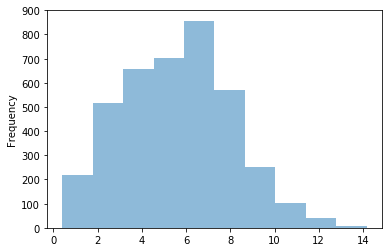

In [105]:
#Mean of expression data for each gene
exp_data_clean.mean(axis='columns').plot.hist(alpha=0.5)

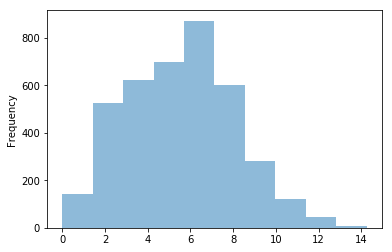

In [106]:
#Median of expression data for each gene
exp_data_clean.median(axis='columns').plot.hist(alpha=0.5)

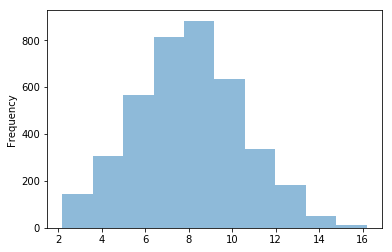

In [107]:
#Max of expression data for each gene
exp_data_clean.max(axis='columns').plot.hist(alpha=0.5)

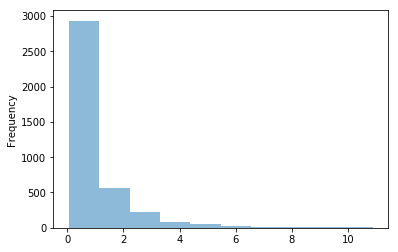

In [108]:
#Variance of expression data for each gene
exp_data_clean.var(axis='columns').plot.hist(alpha=0.5)

In [124]:
#Check if there are any NaN values for each gene
for i in range(len(exp_data_clean)):
    if exp_data_clean.isna().sum(axis='columns')[int('{}'.format(i))] > 0:
        print(i)

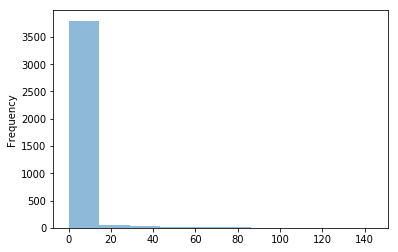

In [129]:
#Determine no expression for each gene per condition. Should we remove any?
exp_data_clean.isin([0]).sum(axis='columns').plot.hist(alpha=0.5)

***Construct an all-to-all matrix to visualize correlations***

In [114]:
#Spearman correlation of conditions
condition_corr = exp_data_clean.corr(method='pearson')
condition_corr.head()

,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_fe2__1,fur__delfur_fe2__2,omics__bw_ac__1,omics__bw_ac__2,omics__bw_fum__1,omics__bw_fum__2,omics__bw_glc__1,omics__bw_glc__2,...,efeU__menFentC_ale29__1,efeU__menFentC_ale29__2,efeU__menFentC_ale30__1,efeU__menFentC_ale30__2,efeU__menFentCubiC_ale36__1,efeU__menFentCubiC_ale36__2,efeU__menFentCubiC_ale37__1,efeU__menFentCubiC_ale37__2,efeU__menFentCubiC_ale38__1,efeU__menFentCubiC_ale38__2
fur__wt_fe__1,1.000000,0.995258,0.961265,0.961329,0.915279,0.915055,0.916266,0.912454,0.956276,0.957817,...,0.847694,0.845409,0.917087,0.927655,0.925206,0.931914,0.933499,0.937127,0.928086,0.919871
fur__wt_fe__2,0.995258,1.000000,0.959343,0.959447,0.916563,0.916683,0.918614,0.914363,0.955596,0.956590,...,0.844407,0.841542,0.915149,0.924907,0.920022,0.926627,0.927788,0.931005,0.926977,0.917851
fur__delfur_fe2__1,0.961265,0.959343,1.000000,0.996215,0.907903,0.909120,0.906395,0.902666,0.949746,0.950345,...,0.831966,0.828281,0.884440,0.900251,0.936094,0.939623,0.942797,0.944842,0.905707,0.903569
fur__delfur_fe2__2,0.961329,0.959447,0.996215,1.000000,0.907105,0.908313,0.905197,0.901299,0.949985,0.950990,...,0.828339,0.824265,0.880487,0.895894,0.932435,0.936972,0.940636,0.942320,0.902264,0.900251
omics__bw_ac__1,0.915279,0.916563,0.907903,0.907105,1.000000,0.992056,0.964400,0.961799,0.935773,0.936522,...,0.812533,0.809666,0.867702,0.874351,0.872987,0.879320,0.877498,0.879691,0.867741,0.860724


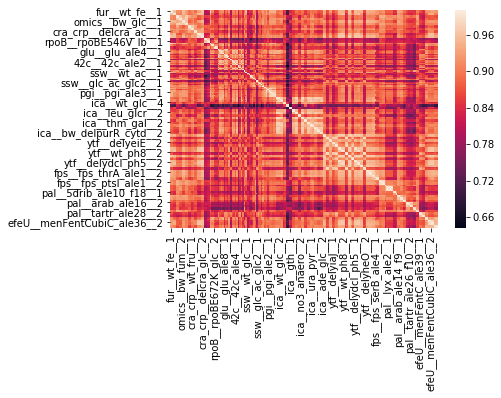

In [119]:
#Visualize conditions matrix
sns.heatmap(condition_corr)
plt.show()

In [115]:
#Transpose expression data
exp_data_t = exp_data_clean.T
#Spearman correlation of genes
gene_corr = exp_data_t.corr(method='pearson')
gene_corr.head()

log-TPM,b0002,b0003,b0004,b0005,b0006,b0007,b0008,b0009,b0010,b0011,...,b4660_1,b4661,b4662,b4676,b4686,b4688,b4693,b4696_1,b4696_2,b4705
log-TPM,,,,,,,,,,,,,,,,,,,,,
b0002,1.000000,0.437518,0.409568,0.254129,0.116345,-0.094055,0.243583,-0.083971,-0.213824,-0.280177,...,-0.106933,-0.205167,0.024471,-0.011397,-0.127308,-0.167668,-0.205400,-0.232266,-0.256296,-0.190874
b0003,0.437518,1.000000,0.967498,0.731224,0.332151,-0.180696,0.429880,-0.275537,-0.201338,-0.345924,...,0.046006,-0.248666,-0.072698,-0.147892,-0.305636,-0.259998,-0.191247,-0.247025,-0.364767,-0.331213
b0004,0.409568,0.967498,1.000000,0.728997,0.367314,-0.186039,0.438744,-0.288906,-0.124117,-0.377716,...,0.107720,-0.255770,-0.117071,-0.208344,-0.331479,-0.245273,-0.236629,-0.275195,-0.383718,-0.338946
b0005,0.254129,0.731224,0.728997,1.000000,0.220645,-0.064204,0.270043,-0.167059,0.057975,-0.133665,...,-0.051977,-0.188690,0.094220,0.078424,0.000620,0.100628,-0.263637,-0.304794,-0.250103,-0.016311
b0006,0.116345,0.332151,0.367314,0.220645,1.000000,-0.022349,0.338771,-0.299090,-0.147364,-0.230423,...,0.077451,-0.125338,-0.133245,-0.148230,-0.337152,-0.351277,-0.199652,-0.004519,-0.155874,-0.313618


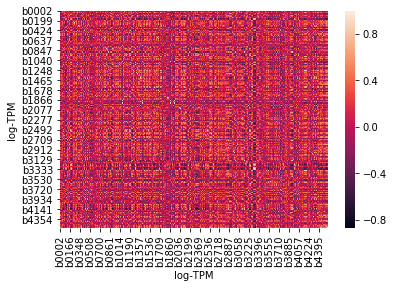

In [120]:
#Visualize genes matrix
sns.heatmap(gene_corr)
plt.show()